In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from wdtools import *

In [4]:
# counties listed should have the same years available
start = time.time()
Lake_taxlot = combine_taxlot(yearstart=2011, yearend=2017, all_counties=False, counties=['Lake'])
Marion_taxlot = combine_taxlot(yearstart=2009, yearend=2017, skips=[2010, 2013], all_counties=False, counties=['Marion'])
all_taxlot = Lake_taxlot.append(Marion_taxlot)
end = time.time()
print(f'it took {round((end - start)/60, 0)} minutes to complete')

it took 1.0 minutes to complete


In [5]:
setID = 'Set008'; nm_to_add = 5402

In [6]:
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add)

In [7]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'record_ID', 'field', 'cor_type', 'from', 'to'])

In [8]:
ml = 'N'

In [9]:
notes = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'review_unmatched_{setID}_r2_{ml}_0.csv'))

In [10]:
notes.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 'latitude',
       'longitude', 'DecisionLink', 'record_ID', 'IDyear', 'correct_type',
       'correction', 'cor_trsqq', 'ORTaxlot'],
      dtype='object')

In [10]:
notes.shape

(6, 13)

In [11]:
i=0

In [73]:
i = i+1

In [76]:
i = 5

In [13]:
notes

,wetdet_delin_number,trsqq,parcel_id,county,latitude,longitude,DecisionLink,record_ID,IDyear,correct_type,correction,cor_trsqq,ORTaxlot
0,WD2011-0023,08S01E24,100,Marion,44.867500,-122.637700,https://docs.dsl.state.or.us/PublicReview/Elec...,5614,2011,section number,from 24 to 14,08S01E1400,2408.00S01.00E1400--000000100
1,WD2010-0305,06S01W10C,1900,Marion,45.072100,-122.801500,https://docs.dsl.state.or.us/PublicReview/Elec...,5588,2010,section number and QQ,from 10 and C0 to 03 and CC,06S01W03CC,2406.00S01.00W03CC--000001900
2,WD2010-0015,07S02W32A,6700p,Marion,44.920975,-122.958189,https://docs.dsl.state.or.us/PublicReview/Elec...,5552,2010,QQ,from A0 to AC,07S02W32AC,2407.00S02.00W32AC--000006700
3,WD2008-0098,05S03W11AA,900,Marion,45.151060,-123.021000,https://docs.dsl.state.or.us/PublicReview/Elec...,5466,2008,QQ,from AA to 00,05S03W1100,2405.00S03.00W1100--000000500
4,WD2012-0175,09S03E30DD,"100, 102, 3600",Marion,44.755800,-122.477400,https://docs.dsl.state.or.us/PublicReview/Elec...,5678,2012,to review,"some lots are not matched, need to review trsq...",09S03E30DA,2409.00S03.00E30DA--000003700
5,WD2013-0362,11S03W05CC,4500,Marion,44.638200,-123.087300,https://docs.dsl.state.or.us/PublicReview/Elec...,5727,2013,coordinate,"coordinate might be incorrect, nearby taxlot i...",10S03W24,2410.00S03.00W2400--0000WATER


In [77]:
notes.loc[i, ['wetdet_delin_number', 'record_ID', 'trsqq', 'county', 'correct_type', 
              'correction', 'cor_trsqq', 'parcel_id', 'ORTaxlot']]

wetdet_delin_number                                          WD2013-0362
record_ID                                                           5727
trsqq                                                         11S03W05CC
county                                                            Marion
correct_type                                                  coordinate
correction             coordinate might be incorrect, nearby taxlot i...
cor_trsqq                                                       10S03W24
parcel_id                                                           4500
ORTaxlot                                   2410.00S03.00W2400--0000WATER
Name: 5, dtype: object

In [71]:
wdID = notes.loc[i,'wetdet_delin_number']
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
if str(url) == 'nan':
    print('Decision link is not available')
else:
    webbrowser.open(url)
selcols = ['wetdet_delin_number', 'county', 'trsqq', 'parcel_id', 'latitude', 'longitude', 'record_ID', 'notes', 'status_name', 'is_batch_file']
wd.loc[wd.wetdet_delin_number == wdID, selcols]

,wetdet_delin_number,county,trsqq,parcel_id,latitude,longitude,record_ID,notes,status_name,is_batch_file
324,WD2013-0362,Marion,11S03W05CC,4500,44.6382,-123.0873,5727,,Completed by DSL,Y


In [28]:
txlot = create_ORTaxlot(cnt_code=24, trsqq='08S02E29', lot='100')

In [29]:
txlot in all_taxlot.ORTaxlot.unique()

False

In [15]:
all_taxlot[all_taxlot.ORTaxlot==notes.loc[i,'ORTaxlot']]

,year,county,ORTaxlot,geometry
160,2009.0,Marion,2408.00S01.00E1400--000000100,"MULTIPOLYGON (((765370.284 1149932.521, 765358..."
193385,2011.0,Marion,2408.00S01.00E1400--000000100,"MULTIPOLYGON (((751571.441 1154489.143, 750906..."
194704,2011.0,Marion,2408.00S01.00E1400--000000100,"MULTIPOLYGON (((746937.137 1154585.813, 747082..."
198137,2011.0,Marion,2408.00S01.00E1400--000000100,"MULTIPOLYGON (((760117.224 1151567.321, 760425..."
200662,2011.0,Marion,2408.00S01.00E1400--000000100,"MULTIPOLYGON (((762323.099 1150165.323, 762716..."
...,...,...,...,...
551252,2015.0,Marion,2408.00S01.00E1400--000000100,"MULTIPOLYGON (((762686.114 1148820.954, 762686..."
555833,2015.0,Marion,2408.00S01.00E1400--000000100,"MULTIPOLYGON (((753272.928 1143844.361, 753429..."
556146,2015.0,Marion,2408.00S01.00E1400--000000100,"MULTIPOLYGON (((753220.756 1141743.400, 753236..."
562506,2015.0,Marion,2408.00S01.00E1400--000000100,"MULTIPOLYGON (((760779.127 1129873.992, 760894..."


<AxesSubplot:>

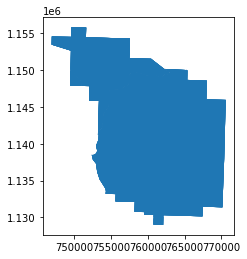

In [16]:
all_taxlot[all_taxlot.ORTaxlot==notes.loc[i,'ORTaxlot']].plot()

In [72]:
lon=wd.loc[wd.wetdet_delin_number == wdID, 'longitude'].values[0]
lat=wd.loc[wd.wetdet_delin_number == wdID, 'latitude'].values[0]
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-123.0873,44.6382,POINT (639099.198 1063368.895)


In [299]:
taxlot = create_ORTaxlot(cnt_code=cnt_dict['Deschutes'], trsqq='22S10E02', lot='1002')
print(taxlot)

0922.00S10.00E0200--000001002


In [300]:
taxlot in all_txid

False

In [76]:
all_taxlot[all_taxlot.ORTaxlot==taxlot]

,year,ORTaxlot,geometry
810645,2011,0916.00S12.00E31D0--000004800,"MULTIPOLYGON (((1094765.050 871962.922, 109476..."
2198705,2012,0916.00S12.00E31D0--000004800,"MULTIPOLYGON (((4703629.272 902211.817, 470362..."
3692916,2014,0916.00S12.00E31D0--000004800,"MULTIPOLYGON (((1094765.258 871962.208, 109476..."
5468078,2015,0916.00S12.00E31D0--000004800,"MULTIPOLYGON (((1094765.258 871962.208, 109476..."
7111397,2016,0916.00S12.00E31D0--000004800,"MULTIPOLYGON (((1094765.050 871962.922, 109476..."


In [58]:
print(notes.loc[i, 'correction'])

from AA to 00


In [59]:
ctyp = notes.loc[i,'correct_type']#.split(' and ')[1]
ctyp

'QQ'

In [141]:
ctyp = 'QQ'

In [60]:
crt = notes.loc[i,'correction']
crt

'from AA to 00'

In [61]:
ft = crt.split('from ')[1].split(' to ')
ft

['AA', '00']

In [86]:
ft = ['1N1E33AC', '01N01E33AC']

In [73]:
ft[0] = '00'

In [38]:
ft[1] = 'DB'

In [39]:
ft

['Multnomah', 'Washington']

In [135]:
f = crt.split('from ')[1].split(' and ')[0]
t = crt.split(' to ')[1].split(' and ')[0]

In [142]:
f = crt.split(' and ')[1].split(' to ')[0]
t = crt.split(' and ')[2]

In [143]:
print(f, t)

00 CD


In [62]:
rID = notes.loc[i,'record_ID']
rID

5466

In [283]:
df = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'))

In [271]:
'09S35.5E00'.replace(df.loc[3, 'from'], df.loc[3, 'to'])

'09S35VE00'

In [63]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [36]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': 'section number', 'from': 10, 'to': 3},
        ignore_index = True)

In [37]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': 'QQ', 'from': 'C0', 'to': 'CC'},
        ignore_index = True)

In [59]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'county', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [308]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'parcel_id', 'cor_type': 'parcel id', 'from': '200', 'to': '1002'},
        ignore_index = True)

In [144]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': f, 'to': t},
        ignore_index = True)

In [597]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'county', 'cor_type': 'county', 'from': 'Benton', 'to': 'Polk'},
        ignore_index = True)

In [41]:
df.loc[1:2, 'wetdet_delin_number'] = wdID

In [64]:
df

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2011-0023,5614,trsqq,section number,24,14
1,WD2010-0305,5588,trsqq,section number,10,3
2,WD2010-0305,5588,trsqq,QQ,C0,CC
3,WD2010-0015,5552,trsqq,QQ,A0,AC
4,WD2008-0098,5466,trsqq,QQ,AA,00


In [70]:
df.loc[2, 'field'] = 'parcel_id'

In [65]:
df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'), index=False)

In [44]:
df.shape

(3, 6)

In [78]:
r1df = pd.read_csv(os.path.join(inpath + f'\\output\\to_review\\unmatched_df_{setID}_r1_N.csv'))

In [188]:
r1df.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'DocumentName', 'DecisionLink', 'is_batch_file', 'status_name',
       'received_date', 'Coord-Source', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [79]:
wdIDs = r1df.wetdet_delin_number.unique()

In [80]:
wdIDs

array(['WD2010-0215'], dtype=object)

In [81]:
i = 0

In [198]:
i = i + 1

In [89]:
i

5

In [243]:
# need to create the notes first
#df = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r1_{ml}_notes.csv'))

In [82]:
r1df.loc[r1df.wetdet_delin_number == wdIDs[i], ['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 
                                                'latitude', 'longitude', 'record_ID', 'notes', 'status_name', 'is_batch_file']]

,wetdet_delin_number,trsqq,parcel_id,county,latitude,longitude,record_ID,notes,status_name,is_batch_file
0,WD2010-0215,08S03W30CD,"11800,13600",Marion,44.841928,-122.857592,5582,NaN,Approved,N
1,WD2010-0215,08S03W30C,1700p,Marion,44.841928,-122.857592,5580,Partial,Approved,N
2,WD2010-0215,08S03W30CA,"7900, 8000",Marion,44.841928,-122.857592,5581,NaN,Approved,N


In [83]:
url = r1df.loc[r1df.wetdet_delin_number == wdIDs[i], 'DecisionLink'].values[0]
if str(url) == 'nan':
    print('Decision link is not available')
else:
    webbrowser.open(url)

In [84]:
j=0

In [85]:
sel = r1df.wetdet_delin_number == wdIDs[i]

In [92]:
j = j + 1

In [427]:
j

1

In [86]:
crt = review_wd_record_w_coord(wd_id=wdIDs[i], 
                         county_to_check=r1df.loc[sel, 'county'].values[j], 
                         trsqq_to_check=r1df.loc[sel, 'trsqq'].values[j], 
                         parcel_IDs_to_check=r1df.loc[sel, 'parcel_id'].values[j], 
                         lon=r1df.loc[sel, 'longitude'].values[j], 
                         lat=r1df.loc[sel, 'latitude'].values[j], 
                         taxlot=all_taxlot, 
                         year=r1df.loc[sel, 'IDyear'].values[j])
print(crt)

reviewing WD2010-0215
all lots are matched...
corrected trsqq...
('range number', 'from 03 to 01')


In [204]:
lon=wd.loc[wd.wetdet_delin_number == wdIDs[i], 'longitude'].values[0]
lat=wd.loc[wd.wetdet_delin_number == wdIDs[i], 'latitude'].values[0]
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-123.874483,46.137236,POINT (456831.787 1616930.213)


In [87]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'record_ID', 'field', 'cor_type', 'from', 'to'])

In [88]:
wdIDs[i]

'WD2010-0215'

In [93]:
df = df.append({'wetdet_delin_number': wdIDs[i],
                'record_ID': r1df.loc[sel, 'record_ID'].values[j],
                'field': 'trsqq', 
                'cor_type': 'range number', 
                'from': '03', 
                'to': '01'},
        ignore_index = True)

In [208]:
df = df.append({'wetdet_delin_number': wdIDs[i],
                'record_ID': r1df.loc[sel, 'record_ID'].values[j],
                'field': 'parcel_id', 
                'cor_type': 'parcel id', 
                'from': '201', 
                'to': '2400'},
        ignore_index = True)

In [94]:
df

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2010-0215,5582,trsqq,range number,03,01
1,WD2010-0215,5580,trsqq,range number,03,01
2,WD2010-0215,5581,trsqq,range number,03,01


In [95]:
ml

'N'

In [263]:
ml = 'N'

In [96]:
df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r1_{ml}_notes.csv'), index=False)